In [41]:
import numpy as np
import gen_gbu
import rnn
import custom_rnn
import torch.nn as nn
import time
import random
import math
import matplotlib.pyplot as plt 

In [56]:
## RNN Luke Truitt (lot) and Mary Gooneratne (mmg53)

In [42]:
## Build the initial model
# Initialize all relevant parameters

### Data
X, Y = gen_gbu.gen_gbu(1000)
train_X, train_Y = rnn.preprocess(X, Y)

# Initialize our size, for this we'll use 20D hidden layer
n_input = 3
n_hidden = 20
n_output = 3

# Initialize our RNN
test_rnn = rnn.RNN(n_input, n_hidden, n_output)

# Specify our loss criteria
criterion = nn.NLLLoss()
learning_rate = 0.004
n_iters = 1500

# Keep track of losses for plotting
print_every = 500
plot_every = 100
current_loss = 0
all_losses = []

In [43]:
## Data collection helper methods
def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

def randomChoice(l):
    return random.randint(0, len(l) - 1)


def randomTrainingExample():
    index = randomChoice(train_X)
    input_choice = train_X[index]
    output_choice = train_Y[index]

    return input_choice, output_choice

def train(truth, input):
    hidden_layer = test_rnn.initHidden()

    test_rnn.zero_grad()

    for i in range(input.size()[0]):
        hidden_layer, output = test_rnn(input[i], hidden_layer)

    loss = criterion(output, truth)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in test_rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

In [44]:
# Train
start = time.time()

for iter in range(1, n_iters + 1):
    i_sel, o_sel = randomTrainingExample()
    output, loss = train(o_sel, i_sel)
    current_loss += loss
    top_n, top_i = output.topk(1)
    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        correct = '✓' if top_i == o_sel else '✗ (%s)' % top_i
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters *
                                                100, timeSince(start), loss, i_sel, o_sel, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

print(all_losses)

500 33% (0m 2s) 0.3949 tensor([[[1, 0, 0]],

        [[1, 0, 0]],

        [[0, 0, 1]],

        [[0, 0, 1]],

        [[0, 0, 1]],

        [[0, 0, 1]],

        [[0, 0, 1]]]) / tensor([2]) ✓
1000 66% (0m 6s) 0.0050 tensor([[[1, 0, 0]],

        [[1, 0, 0]],

        [[0, 1, 0]],

        [[0, 1, 0]],

        [[1, 0, 0]],

        [[0, 1, 0]],

        [[0, 1, 0]],

        [[1, 0, 0]],

        [[0, 1, 0]],

        [[0, 1, 0]],

        [[0, 1, 0]],

        [[0, 1, 0]],

        [[0, 1, 0]],

        [[0, 1, 0]],

        [[0, 1, 0]],

        [[0, 1, 0]],

        [[1, 0, 0]]]) / tensor([0]) ✓
1500 100% (0m 9s) 0.0000 tensor([[[1, 0, 0]],

        [[1, 0, 0]],

        [[1, 0, 0]],

        [[1, 0, 0]],

        [[1, 0, 0]],

        [[1, 0, 0]],

        [[1, 0, 0]],

        [[1, 0, 0]],

        [[1, 0, 0]],

        [[1, 0, 0]],

        [[1, 0, 0]],

        [[1, 0, 0]],

        [[1, 0, 0]],

        [[1, 0, 0]]]) / tensor([2]) ✓
[1.034365740418434, 0.9471333706378937, 0.85

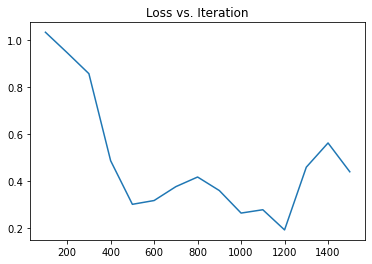

In [49]:
## Plot Loss
plot_x = [(i * plot_every) for i in range(1,len(all_losses)+1)]
plt.plot(plot_x,all_losses)
plt.title('Loss vs. Iteration')
plt.show()

In [50]:
## Snag Parameters
model_params = list(test_rnn.parameters())
model_weights = model_params[0].data.numpy()
model_bias = model_params[1].data.numpy()


In [51]:
# Initialize custom model
W1 = model_weights
W2 = model_bias
test_data = np.array([[1,0,0], [0,1,0], [0,1,0]])
truth = 0

In [55]:
c_rnn = custom_rnn.r_neural_network()
guess=0
for d in test_data:
    guess += c_rnn.forward(d)
print(guess/3)


NONE
[-0.32708484 -0.16692155  0.4200034  -1.04312533 -0.71338738 -1.14406927
 -0.14268382 -1.17896791 -1.43830394 -1.16751999 -0.66968808 -0.06186371
 -0.76015676 -0.0386477   0.21498058  1.70140698 -0.74690264 -0.14897999
  1.80279867  0.02156262]
(20,)
[3.51652736]
(1,)
[ 1.63648871 -1.69336268  0.55086015  0.19082584 -0.02054373  0.20221038
 -0.00740248 -0.01119217  0.32303087 -0.08375337 -0.82982167 -0.43122295
 -1.31731176  1.75119344 -0.86208529  0.25839973  0.81269989  0.73318288
 -0.07143364 -0.45715983]
(20,)
[1.98443992]
(1,)
[ 1.63648871 -1.69336268  0.55086015  0.19082584 -0.02054373  0.20221038
 -0.00740248 -0.01119217  0.32303087 -0.08375337 -0.82982167 -0.43122295
 -1.31731176  1.75119344 -0.86208529  0.25839973  0.81269989  0.73318288
 -0.07143364 -0.45715983]
(20,)
[1.98443992]
(1,)
[1.]
